# Project
*Team #1 - Connie Dunlap, Ryne Krueger, Jackson Robbins, Wyatt Tauber*

*CSEC-520/620 Cyber Analytics & Machine Learning*

## Prerequisites

This notebook requires the following packages:
* TBD

The following files and folder should be in the same directory as this notebook:
* TBD

## 1 Data Selection & Processing

Process the data from raw executable files into useable features for our selected ML models. See the project PDF for details.

In [104]:
"""
1.2 Feature Extraction
Author: Wyatt Tauber

Convert the raw executable files into sha256_hash,packer,entropy lists
"""
import os
import subprocess

# the feature lists
packed_data = []
unpacked_data = []

# loop through each packer directory and process the files
for dir in os.listdir():
    if '.' not in dir:
        for file in os.listdir(dir):
            # call radare2 to calcualte entropy and store the result
            command = "rahash2 -a entropy"
            string = dir + "/" + file
            proc = subprocess.Popen([command + " " + string], stdout=subprocess.PIPE, shell=True)
            (out, err) = proc.communicate()

            # get the hash and entropy of the file
            file_info = out.decode().strip().split()
            
            file_hash = file_info[0].split("/")[-1][0:-1]
            file_entropy = file_info[-1]
            
            # place the file information in the appropriate list
            if 'unpacked' in file_hash:
                file_hash = file_hash.split('_')[-1]
                file_packer = "none"
                datapoint = [file_hash,file_packer,file_entropy]
                unpacked_data.append(datapoint)
            else:
                file_packer = dir
                datapoint = [file_hash,file_packer,file_entropy]
                packed_data.append(datapoint)

In [105]:
"""
1.3 Dataset Cleaning
Author: Jackson Robbins, Wyatt Tauber

Convert the lists into numeric values supported by Numpy
"""
from sklearn.model_selection import train_test_split
import numpy as np

# create train/test splits of all of the data
total_data = packed_data + unpacked_data
train_set, test_set = train_test_split(total_data, test_size=0.4, random_state=7294802)

# create the label and data lists for the splits
train_label = []
test_label = []
train_data = []
test_data = []

for data in train_set:
    #  store the training labels
    if data[1] == "none":
        train_label.append(0)
    else:
        train_label.append(1)
        
    # store the training data
    train_data.append(float(data[2]))
   
for data in test_set:
    # store the testing labels 
    if data[1] == "none":
        test_label.append(0)
    else:
        test_label.append(1)
        
    # store the testing data
    test_data.append(float(data[2]))
    
# convert the data to Numpy arrays
train_label = np.asarray(train_label)
test_label = np.asarray(test_label)
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)

## 2 Experiments & Results

Implement various ML models, tune hyperparameters, and present metrics. See the project PDF for details.

Logistic Regression Metrics:
Accuracy: 0.8560606060606061
Precision: 0.8968253968253969
Recall: 0.8188405797101449
F1-score: 0.856060606060606

Figure 1: Logistic Regression Confusion Matrix


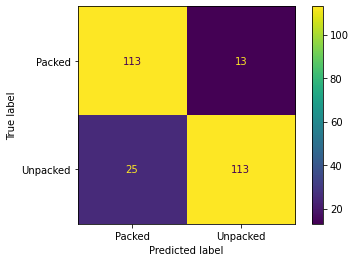

In [106]:
"""
2.1 Logistic Regression
Author: Jackson Robbins, Wyatt Tauber

An sklearn logistic regression implementation
"""
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# reshape the data into 2 dimensions
logistic_train_data = train_data.reshape(-1,1)
logistic_test_data = test_data.reshape(-1,1)

# perform logistic regression on the train data
# TODO: "hyperparameter" tuning? plots?
logisticRegr = LogisticRegression()
logisticRegr.fit(logistic_train_data, train_label)

# make predictions on the test data
logistic_predictions = logisticRegr.predict(logistic_test_data)

# print the metrics
logistic_accuracy = accuracy_score(logistic_predictions, test_label)
logistic_precision = precision_score(logistic_predictions, test_label)
logistic_recall = recall_score(logistic_predictions, test_label)
logistic_f1 = f1_score(logistic_predictions, test_label)

print("Logistic Regression Metrics:")
print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1-score:", logistic_f1)

# create the confusion matrix
logistic_cf_matrix = confusion_matrix(logistic_predictions, test_label)
display = ConfusionMatrixDisplay(confusion_matrix=logistic_cf_matrix, display_labels=["Packed", "Unpacked"])
display.plot()

# display the confusion matrix
print("\nFigure 1: Logistic Regression Confusion Matrix")
plt.show()

## 2.2 Linear SVM

Linear SVM Metrics:
Accuracy: 0.8674242424242424
Precision: 0.8968253968253969
Recall: 0.837037037037037
F1-score: 0.8659003831417625

Figure 2: Linear SVM Confusion Matrix


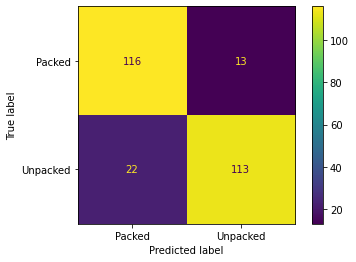

In [107]:
"""
2.2 Linear SVM
Author: Jackson Robbins, Wyatt Tauber

A sklearn linear SVM implementation
"""
from sklearn.svm import SVC

# reshape the data into 2 dimensions
svm_train_data = train_data.reshape(-1,1)
svm_test_data = test_data.reshape(-1,1)

# run linear SVM on the train data
# TODO: hyperparameter tuning? plots?
clf = SVC(kernel='linear')
clf.fit(svm_train_data, train_label)

# make predictions on the test data
svm_predictions = clf.predict(svm_test_data)

# print the metrics
svm_accuracy = accuracy_score(svm_predictions, test_label)
svm_precision = precision_score(svm_predictions, test_label)
svm_recall = recall_score(svm_predictions, test_label)
svm_f1 = f1_score(svm_predictions, test_label)

print("Linear SVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)

# create the confusion matrix
svm_cf_matrix = confusion_matrix(svm_predictions, test_label)
display = ConfusionMatrixDisplay(confusion_matrix=svm_cf_matrix, display_labels=["Packed", "Unpacked"])
display.plot()

# display the confusion matrix
print("\nFigure 2: Linear SVM Confusion Matrix")
plt.show()

## 2.3 k-Means

k-Means Metrics:
Accuracy: 0.8901515151515151
Precision: 0.8968253968253969
Recall: 0.875968992248062
F1-score: 0.8862745098039216

Figure 3: k-Means Confusion Matrix


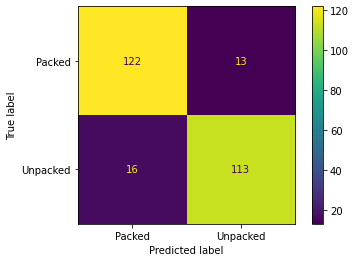

In [150]:
"""
2.3 k-Means
Author: Jackson Robbins, Wyatt Tauber

A sklearn k-Means implementation
"""
from sklearn.cluster import KMeans

# reshape the data into 2 dimensions
km_train_data = train_data.reshape(-1,1)
km_test_data = test_data.reshape(-1,1)

# run k-means on the train data
# TODO: hyperparameter tuning? plots?
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04
)
km.fit(km_train_data, train_label)

# make predictions on the test data
km_predictions = km.predict(km_test_data, test_label)

# print the metrics
km_accuracy = accuracy_score(km_predictions, test_label)
km_precision = precision_score(km_predictions, test_label)
km_recall = recall_score(km_predictions, test_label)
km_f1 = f1_score(km_predictions, test_label)

print("k-Means Metrics:")
print("Accuracy:", km_accuracy)
print("Precision:", km_precision)
print("Recall:", km_recall)
print("F1-score:", km_f1)

# create the confusion matrix
km_cf_matrix = confusion_matrix(km_predictions, test_label)
display = ConfusionMatrixDisplay(confusion_matrix=km_cf_matrix, display_labels=["Packed", "Unpacked"])
display.plot()

# display the confusion matrix
print("\nFigure 3: k-Means Confusion Matrix")
plt.show()

## 2.4 DBSCAN

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
DBSCAN Metrics:
Accuracy: 0.28939393939393937
Precision: 0.5592705167173252
Recall: 0.36220472440944884
F1-score: 0.43966547192353644


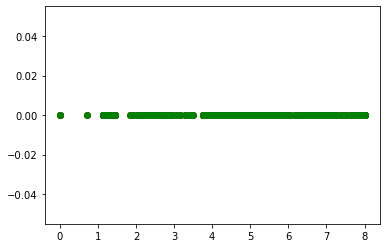

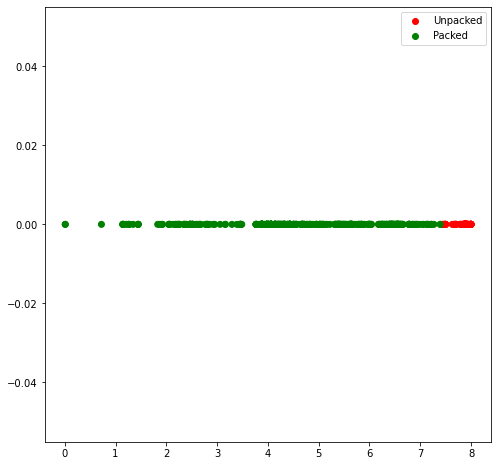

In [182]:
"""
2.4 DBSCAN
Author: Wyatt Tauber

A sklearn DBSCAN implementation
TODO: doesn't work yet
"""
from sklearn.cluster import DBSCAN

import numpy as np
import scipy as sp

def dbscan_predict(dbscan_model, X_new, metric=sp.spatial.distance.cosine):
    # Result is noise by default
    y_new = np.ones(shape=len(X_new), dtype=int)*-1

    # Iterate all input samples for a label
    for j, x_new in enumerate(X_new):
        # Find a core sample closer than EPS
        for i, x_core in enumerate(dbscan_model.components_):
            if metric(x_new, x_core) < dbscan_model.eps:
                # Assign label of x_core to x_new
                y_new[j] = dbscan_model.labels_[dbscan_model.core_sample_indices_[i]]
                break

    return y_new

# reshape the data into 2 dimensions
db_train_data = train_data.reshape(-1,1)
db_test_data = test_data.reshape(-1,1)

# merge the sets for DBSCAN
db_total_data = np.concatenate([db_train_data, db_test_data])
db_total_labels = np.concatenate([train_label, test_label])

# run DBSCAN on the training data
# TODO: hyperparameter tuning? plots?
db = DBSCAN(eps=0.5, min_samples=10).fit(db_train_data)

# make predictions on the data
#db_predictions = db.labels_

db_predictions = dbscan_predict(db, db_test_data)
print(db_predictions)

# TODO: shouldn't do this but idk how to get it to work otherwise
# db_predictions[db_predictions > 1] = 1
# db_predictions[db_predictions < 0] = 0

# print the metrics
db_accuracy = accuracy_score(labels, db_total_labels)
db_precision = precision_score(labels, db_total_labels)
db_recall = recall_score(labels, db_total_labels)
db_f1 = f1_score(labels, db_total_labels)

print("DBSCAN Metrics:")
print("Accuracy:", db_accuracy)
print("Precision:", db_precision)
print("Recall:", db_recall)
print("F1-score:", db_f1)

# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
r = plt.scatter(db_total_data, np.zeros(len(db_total_data)), color ='r');
g = plt.scatter(db_total_data, np.zeros(len(db_total_data)), color ='g');

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined
plt.figure(figsize =(8, 8))
plt.scatter(db_total_data, np.zeros(len(db_total_data)), c = cvec)

# Building the legend
plt.legend((r, g), ('Unpacked', 'Packed'))

plt.show()

## 2.5 Naive Bayes

Naive Bayes Metrics:
Accuracy: 0.8787878787878788
Precision: 0.8095238095238095
Recall: 0.9272727272727272
F1-score: 0.864406779661017

Figure 5: Naive Bayes Confusion Matrix


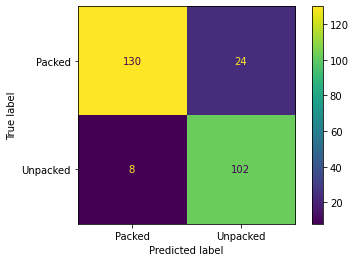

In [198]:
"""
2.5 Naive Bayes
Author: Wyatt Tauber

A sklearn Naive Bayes implementation
"""
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

# reshape the data into 2 dimensions
nb_train_data = train_data.reshape(-1,1)
nb_test_data = test_data.reshape(-1,1)

# run Naive Bayes on the training data
# TODO: "hyperparameter" tuning? plots?
nb = CategoricalNB()
nb.fit(nb_train_data, train_label)

# make predictions on the test data
nb_predictions = nb.predict(nb_test_data)

# print the metrics
nb_accuracy = accuracy_score(nb_predictions, test_label)
nb_precision = precision_score(nb_predictions, test_label)
nb_recall = recall_score(nb_predictions, test_label)
nb_f1 = f1_score(nb_predictions, test_label)

print("Naive Bayes Metrics:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-score:", nb_f1)

# create the confusion matrix
nb_cf_matrix = confusion_matrix(nb_predictions, test_label)
display = ConfusionMatrixDisplay(confusion_matrix=nb_cf_matrix, display_labels=["Packed", "Unpacked"])
display.plot()

# display the confusion matrix
print("\nFigure 5: Naive Bayes Confusion Matrix")
plt.show()